## 3.1 Churn prediction project

## 3.1.1 Telco churn dataset

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r'C:\Users\Raimu\PastaMain\Documentos\client_churn_prediction_classification\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
len(df)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

---
A thing to note is the type for TotalCharges. We would expect this column to
be numeric: it contains the total amount of money the client was charged, so it should
be a number, not a string. 

---

In [5]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')

df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,yes


In [9]:
df.churn = (df.churn == 'yes').astype(int)

In [10]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [11]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

### 3.1.3 Exploratory data analysis

In [12]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

---
As we see, the majority of the customers didn’t churn.

---

In [13]:
#check the distribution of values in the target variable
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

---
Our churn dataset is an example of a so-called imbalanced dataset. There were
three times as many people who didn’t churn in our dataset as those who did churn,
and we say that the nonchurn class dominates the churn class.

---

In [14]:
# calculate the churn rate:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

np.float64(0.27)

In [15]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

---
Indeed, we see that most of the columns have two or three values and one
This is good. We don’t need to spend extra time pre-
paring and cleaning the data; everything is already good to go.

---

In [16]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.1.4 Feature importance

---
understanding which features may be important for our model.

It also gives us additional insights about the
dataset and helps answer questions like “What makes customers churn?” and “What
are the characteristics of people who churn?”

---

We can look at all the distinct values of a variable. Then, for each variable, there’s a
group of customers: all the customers who have this value. For each such group, we
can compute the churn rate, which is the group churn rate. When we have it, we can
compare it with the global churn rate — the churn rate calculated for all the observa-
tions at once.

---

The difference between the group rates for both females
and males is quite small, which indicates that knowing the gender of the customer
doesn’t help us identify whether they will churn.

---

In [17]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male: ', round(male_mean, 3))

gender == female: 0.277
gender == male:  0.263


---
As we see, the rates for those who have a partner are quite different from rates for
those who don’t: 20% and 33%, respectively. It means that clients with no partner are
more likely to churn than the ones with a partner

---

In [18]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no:', round(partner_no, 3))

partner == yes: 0.205
partner == no: 0.33


---
__RISK RATIO__

In addition to looking at the difference between the group rate and the global rate,
it’s interesting to look at the ratio between them. In statistics, the ratio between proba-
bilities in different groups is called the risk ratio, where risk refers to the risk of having
the effect. In our case, the effect is churn, so it’s the risk of churning:

___risk = group rate / global rate___

---

If the difference between the group rate and the global rate is small, the risk is
close to 1: this group has the same level of risk as the rest of the population. Customers in the group are as likely to churn as anyone else. In other words, a group with a
risk close to 1 is not risky at all

---

If the risk is lower than 1, the group has lower risks: the churn rate in this group
is smaller than the global churn. For example, the value 0.5 means that the clients
in this group are two times less likely to churn than clients in general

---

On the other hand, if the value is higher than 1, the group is risky: there’s more
churn in the group than in the population. So a risk of 2 means that customers from
the group are two times more likely to churn 

---

___risk = negative outcome rate in group 1 / negative outcome rate in group 2___

---

In [19]:
global_mean = df_train_full.churn.mean()

df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['diff'] = df_group['mean'] / global_mean

df_group

,mean,diff
gender,,
female,0.276824,1.025396
male,0.263214,0.974980


---
Let’s now do that for all categorical variables. We can iterate through them and apply
the same code for each:

---

* For gender, there is not much difference between females and males. Both
means are approximately the same, and for both groups the risks are close to 1.

* Senior citizens tend to churn more than nonseniors: the risk of churning is 1.53
for seniors and 0.89 for nonseniors.

* People with a partner churn less than people with no partner. The risks are 0.75
and 1.22, respectively.

* People who use phone service are not at risk of churning: the risk is close to 1,
and there’s almost no difference with the global churn rate. People who don’t
use phone service are even less likely to churn: the risk is below 1, and the difference with the global churn rate is negative.

---

* Clients with no tech support tend to churn more than those who do.

* People with monthly contracts cancel the contract a lot more often than others,
and people with two-year contacts churn very rarely.

In [20]:
'''from IPython.display import display

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['diff'] = df_group['mean'] / global_mean
    display(df_group)'''

"from IPython.display import display\n\nfor col in categorical:\n    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])\n    df_group['diff'] = df_group['mean'] - global_mean\n    df_group['diff'] = df_group['mean'] / global_mean\n    display(df_group)"

---
___Customers with month-to-month contracts tend to churn a lot
more than customers with other kinds of contracts. This is exactly the kind of
relationship we want to find in our data. Without such relationships in data,
machine learning models will not work — they will not be able to make pre-
dictions. The higher the degree of dependency, the more useful a feature is.___

---

As we see, contract, onlinesecurity, and techsupport are among the most
important features

---

In [21]:
from sklearn.metrics import mutual_info_score 

# 1 Creates a stand-alone function for calculating mutual information
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)  
    # 2 Uses mutual_info_score from scikit-learn to calculate 
    # MI between the input series and the target variable (df_train_full.churn).

# 3 Applies the function from 1 to each categorical column of the dataset.
df_mi = df_train_full[categorical].apply(calculate_mi)

# 4 Sorts the values of the result (Mutual Information scores) in descending order and creates a DataFrame.
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi 

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


---
Mutual information is a way to quantify the degree of dependency between two cate-
gorical variables, but it doesn’t work when one of the features is numerical, so we can-
not apply it to the three numerical variables that we have.

We can, however, measure the dependency between a binary target variable and a
numerical variable. We can pretend that the binary variable is numerical (containing
only the numbers zero and one) and then use the classical methods from statistics to
check for any dependency between these variables.

---

* The longer customers stay, the less often they tend to churn
* Customers who pay more tend to leave more often.
* The longer people stay with the company, the more they have paid in total, so it’s less likely that they will leave.

---

In [22]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## 3.2 Feature engineering

### 3.2.1 One-hot encoding for categorical variables

--- 
As the name suggests, DictVectorizer takes in a dictionary and vectorizes it — that
is, it creates vectors from it. Then the vectors are put together as rows of one matrix.
This matrix is used as input to a machine learning algorithm

To use this method, we need to convert our dataframe to a list of dictionaries, which
is simple to do in Pandas using the to_dict method with the orient="records"
parameter:

---

In [23]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 71,
  'monthlycharges': 86.1,
  'totalcharges': 6045.9},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 60,
  'monthlycharges': 100.5,
  'totalcharges': 6029.0},
 {'gender':

---
* The fit method looks at the content of these dictionaries
and figures out the possible values for each variable and how to map them to the columns in the output matrix. If a feature is categorical, it applies the one-hot encoding
scheme, but if a feature is numerical, it’s left intact.

* The DictVectorizer class can take in a set of parameters. We specify one of them:
sparse=False. This parameter means that the created matrix will not be sparse and
instead will create a simple NumPy array.

---

In [24]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [25]:
x_train = dv.transform(train_dict)
x_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [26]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## 3.3 Machine learning for classification

### 3.3.1 Logistic regression

---
 It’s a
binary classification model, so the target variable yi is binary; the only values it can
have are zero and one. Observations with yi = 1 are typically called positive examples:
examples in which the effect we want to predict is present. Likewise, examples with
yi = 0 are called negative examples: the effect we want to predict is absent. For our project, yi = 1 means that the customer churned, and yi = 0 means the opposite: the cus-
tomer stayed with us.

---

To be able to treat the output as a probability, we need to make sure that the predictions of the model always stay between zero and one. We use a special mathematical function for this purpose called sigmoid

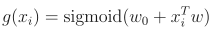

---

The sigmoid function maps any value to a number between zero and one

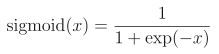

---

The linear regression model has the following formula:

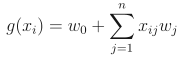

---

Linear regression in Python:

```python
def linear_regression(xi):
    result = bias
    for j in range(n):
        result = result + xi[j] * w[j]
    return result
```
---

Translation of the logistic regression formula to Python
```Python
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
    prob = sigmoid(score)
return prob
```
---

Define the sigmoid function:
```Python
import math

def sigmoid(score):
    return 1 / (1 + math.exp(-score))
```
---


### 3.3.2 Training logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(x_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

---
Apply the one-hot encoding scheme to all the categorical
variables. First, we convert the dataframe to a list of dictionaries and then feed it to
the DictVectorizer we fit previously:

As a result, we get x_val, a matrix with features from the validation dataset.

In [29]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dict)
x_val

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.90000e+01, 1.28605e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.90000e+01, 1.88865e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.10000e+01, 4.90575e+03],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.40000e+01, 2.94500e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 3.56650e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.40000e+01, 9.38650e+02]], shape=(1860, 45))

---
To get the probabilities, we use the predict_
proba method of the model:

The result of predict_proba is a two-dimensional NumPy array

he first column of the array contains the probability that the target is negative (no churn), and the second column contains the probability that the target is positive (churn)

In [30]:
y_pred = model.predict_proba(x_val)
y_pred

array([[0.76508893, 0.23491107],
       [0.7311339 , 0.2688661 ],
       [0.6805482 , 0.3194518 ],
       ...,
       [0.94274725, 0.05725275],
       [0.38476961, 0.61523039],
       [0.93872737, 0.06127263]], shape=(1860, 2))

---
This output (probabilities) is often called soft predictions.

In [31]:
y_pred = model.predict_proba(x_val)[:, 1]
y_pred

array([0.23491107, 0.2688661 , 0.3194518 , ..., 0.05725275, 0.61523039,
       0.06127263], shape=(1860,))

---
___To make the actual decision about whether to send a promotional letter to our cus-
tomers, using the probability alone is not enough. We need hard predictions — binary
values of True (churn, so send the mail) or False (not churn, so don’t send the mail)___

---

To get the binary predictions, we take the probabilities and cut them above a certain threshold. If the probability for a customer is higher than this threshold, we predict churn, otherwise, not churn.

---

In [32]:
y_pred >= 0.5
y_pred

array([0.23491107, 0.2688661 , 0.3194518 , ..., 0.05725275, 0.61523039,
       0.06127263], shape=(1860,))

In [33]:
churn = y_pred >= 0.5
churn

array([False, False, False, ..., False,  True, False], shape=(1860,))

---
calculate accuracy with NumPy:

if the true value in y_pred matches our prediction in churn, the label is
True, and if it doesn’t, the label is False. In other words, we have True if our prediction is correct and False if it’s not.

In [34]:
#y_val = target data, churn = predictions
(y_val == churn).mean()

np.float64(0.8016129032258065)

### 3.3.3 Model interpretation

---
To see which feature is associated with each weight, let’s use the get_feature_
names method of the DictVectorizer. We can zip the feature names together with the
coefficients before looking at them:

In [35]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.563),
 'contract=one_year': np.float64(-0.086),
 'contract=two_year': np.float64(-0.599),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.092),
 'deviceprotection=no': np.float64(0.1),
 'deviceprotection=no_internet_service': np.float64(-0.116),
 'deviceprotection=yes': np.float64(-0.106),
 'gender=female': np.float64(-0.027),
 'gender=male': np.float64(-0.095),
 'internetservice=dsl': np.float64(-0.323),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.116),
 'monthlycharges': np.float64(0.001),
 'multiplelines=no': np.float64(-0.168),
 'multiplelines=no_phone_service': np.float64(0.127),
 'multiplelines=yes': np.float64(-0.081),
 'onlinebackup=no': np.float64(0.136),
 'onlinebackup=no_internet_service': np.float64(-0.116),
 'onlinebackup=yes': np.float64(-0.142),
 'onlinesecurity=no': np.float64(0.258),
 'onlinesecurity=no_internet_service': np.float64(-0.116),
 'onlinesecurity=yes':

--- 
The interpretation of the signs of the weights for one-hot encoded features follows the
same intuition as the bias term. If a weight is positive, the respective feature is an indi-
cator of churn, and vice versa. If it’s negative, it’s more likely to belong to a non-
churning customer.

---

### 3.3.4 Using the model

In [36]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [37]:
x_test = dv.transform([customer])
x_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [38]:
model.predict_proba(x_test)

array([[0.92667761, 0.07332239]])

--- 
All we need from the matrix is the number at the first row and second column: the
probability of churning for this customer.

---

When we execute this line, we see that the output is 0.073, so that the probability
that this customer will churn is only 7%. It’s less than 50%, so we will not send this customer a promotional mail.

---

In [39]:
model.predict_proba(x_test)[0, 1]

np.float64(0.07332239057816664)

In [40]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

---
The output of the model is 83% likelihood of churn, so we should send this client a
promotional mail in the hope of retaining them.

---

In [41]:
x_test = dv.transform([customer])
model.predict_proba(x_test)[0, 1]

np.float64(0.8321649550627843)

## 4.1 Evaluation metrics

### 4.1.1 Classification accuracy

In [43]:
y_pred = model.predict_proba(x_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

np.float64(0.8016129032258065)

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
thresholds = np.linspace(0, 1, 11)

for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


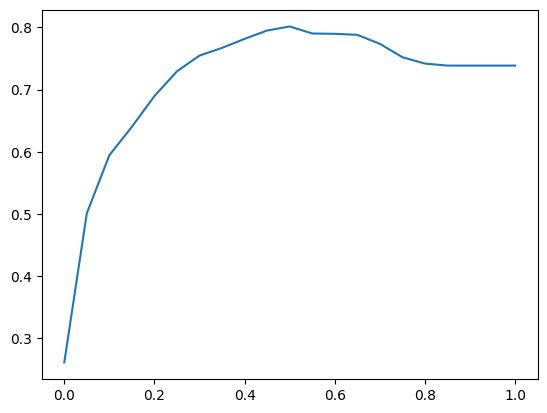

In [48]:
thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)

plt.plot(thresholds, accuracies)

### 4.1.2 Dummy baseline

In [ ]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [50]:
accuracy_score(baseline, y_val)

0.7387096774193549

## 4.2 Confusion table

### 4.2.1 Introduction to the confusion table

### 4.2.2 Calculating the confusion table with Nummpy

In [ ]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()